This Deep Artificial Neural Network model estimate the discharge capacity of LG 18650HG2 Li-ion Battery throught different voltage and temperature discharge test. 

**Data visualization import**

In [193]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

**Data analysis and manipulation import**

In [194]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

**Load data**

 Dataset cite: Kollmeyer, Philip; Vidal, Carlos; Naguib, Mina; Skells, Michael  (2020), “LG 18650HG2 Li-ion Battery Data and Example Deep Neural Network xEV SOC Estimator Script”, Mendeley Data, V3, doi: 10.17632/cp3473x7xv.3

In [195]:
battery_data = '/content/551_Mixed1.csv' # CSV file with discharge test battery variables
bat_data = pd.read_csv(battery_data,index_col=0)
bat_data_util = bat_data.drop(['Step', 'Status', 'Prog Time','Step Time','Cycle','Cycle Level','Procedure','Current','Cnt','WhAccu'], axis=1)
bat_data_util # Voltage, Temperature and Capacity are features and target 

Voltage  Temperature  Capacity
Time Stamp                                           
10/29/2018 2:41:07 PM  4.18464     23.97615  -0.00000
10/29/2018 2:41:07 PM  4.18396     23.97615  -0.00000
10/29/2018 2:41:07 PM  4.18363     23.97615  -0.00001
10/29/2018 2:41:07 PM  4.18363     23.97615  -0.00001
10/29/2018 2:41:08 PM  4.18346     23.97615  -0.00001
...                        ...          ...       ...
10/29/2018 4:49:49 PM  3.20273     23.76583  -2.59012
10/29/2018 4:49:49 PM  3.20273     23.76583  -2.59012
10/29/2018 4:49:49 PM  3.20273     23.76583  -2.59012
10/29/2018 4:49:50 PM  3.20273     23.76583  -2.59012
10/29/2018 4:49:50 PM  3.20273     23.76583  -2.59012

[77227 rows x 3 columns]

**Data interest visualization**

Voltage discharge test

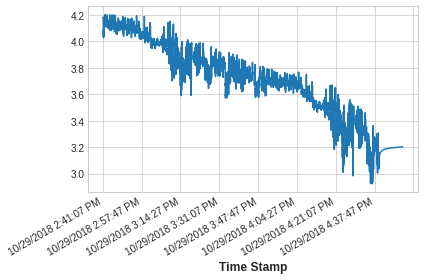

In [196]:
fig, ax = plt.subplots(1)
bat_data_util["Voltage"].plot()
#plt.xticks(rotation=90,ha='right')
fig.autofmt_xdate()

Capacity discharge test

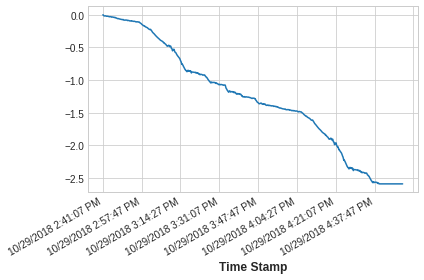

In [197]:
fig, ax = plt.subplots(1)
bat_data_util["Capacity"].plot()
#plt.xticks(rotation=90,ha='right')
fig.autofmt_xdate()

**Create data inputs and output for the Deep Artificial Neural Network**

In [198]:
X = bat_data_util.copy()
y = X.pop('Capacity')

Input data (Voltage and temperature features)

In [199]:
X

Voltage  Temperature
Time Stamp                                 
10/29/2018 2:41:07 PM  4.18464     23.97615
10/29/2018 2:41:07 PM  4.18396     23.97615
10/29/2018 2:41:07 PM  4.18363     23.97615
10/29/2018 2:41:07 PM  4.18363     23.97615
10/29/2018 2:41:08 PM  4.18346     23.97615
...                        ...          ...
10/29/2018 4:49:49 PM  3.20273     23.76583
10/29/2018 4:49:49 PM  3.20273     23.76583
10/29/2018 4:49:49 PM  3.20273     23.76583
10/29/2018 4:49:50 PM  3.20273     23.76583
10/29/2018 4:49:50 PM  3.20273     23.76583

[77227 rows x 2 columns]

**Data transformation and preparation**

This code is under review

In [200]:
# preprocessor = make_column_transformer(
#     (StandardScaler(),
#      make_column_selector(dtype_include=np.number)),
#     (OneHotEncoder(sparse=False),
#      make_column_selector(dtype_include=object)),
# )

In [201]:
# X = preprocessor.fit_transform(X)
# y = np.log(y) # log transform target instead of standardizing

Input_shape for DNN model

In [202]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [2]


**Data standarizacion**

Convert all inputs to values ​​between [0,1]

In [203]:
# Create training and validation splits
df_train = bat_data_util.sample(frac=0.7, random_state=0)
df_valid = bat_data_util.drop(df_train.index)
#display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
#display(df_train.head(4))

# Split features and target
X_train = df_train.drop('Capacity', axis=1)
X_valid = df_valid.drop('Capacity', axis=1)
y_train = df_train['Capacity']
y_valid = df_valid['Capacity']
#display(y_train.head(4))

**Model imports: Tensorflow library and Keras API**

In [204]:
from tensorflow import keras
from tensorflow.keras import layers # This warning don't affect the model flow (It tells about Tensorflow version)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

**Loss and optimizer model configuration**

In [205]:
model.compile(
    optimizer="adam", # Adam algorith is based on Stochastic Gradient Descent (SDG)
    loss="huber_loss", # Under expetimental with different loss fuction
)

**Train model: X,y data for batteries discharge test**

This code is under experimental 

In [206]:
history = model.fit(
    X_train, y_train, # X: voltage and temperature, y: capacity
    validation_data=(X_valid, y_valid),
    batch_size=128, # seed the DNN with data
    epochs=30 # Iterations in the model
)

Epoch 1/30
423/423 [==============================] - 2s 3ms/step - loss: 0.0046
Epoch 2/30
423/423 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 3/30
423/423 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 4/30
423/423 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 5/30
423/423 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 6/30
423/423 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 7/30
423/423 [==============================] - 2s 4ms/step - loss: 9.9693e-04
Epoch 8/30
423/423 [==============================] - 1s 3ms/step - loss: 9.8776e-04
Epoch 9/30
423/423 [==============================] - 1s 3ms/step - loss: 9.7099e-04
Epoch 10/30
423/423 [==============================] - 1s 3ms/step - loss: 9.6123e-04
Epoch 11/30
423/423 [==============================] - 2s 4ms/step - loss: 9.5029e-04
Epoch 12/30
423/423 [==============================] - 2s 5ms/step - loss: 9.5522e-04
E

**Native plot pandas library - plot loss results**

Text(0, 0.5, 'Loss')

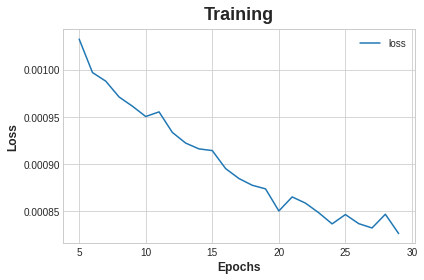

In [207]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In this point differents optimizer, loss function and results are reviewed for train the model. This model uses Tensorflow library and Keras API to get interest characteristic. 

Google Colab is prefered because all artificial intelligence libraries are avaliable.

In [208]:
...

Ellipsis